# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Esosa Asemota</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
wine= pd.read_csv("winequality.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis

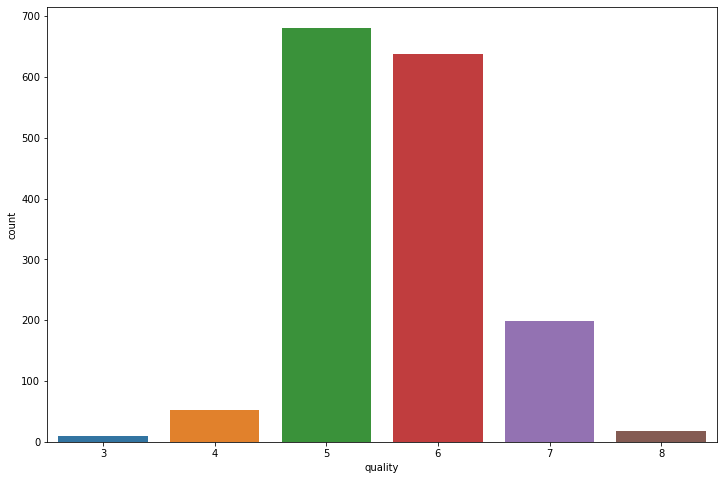

In [14]:
# Our label Distribution (countplot)
count= wine.quality.value_counts()
plt.figure(figsize=(12,8))
sns.countplot(wine.quality)
plt.show()

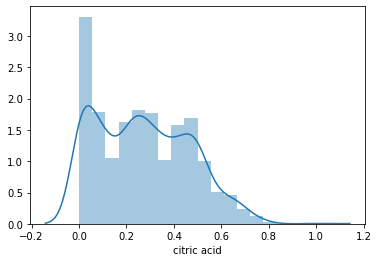

In [15]:
# Example EDA (distplot)
sns.distplot(wine["citric acid"])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [16]:
X= wine.drop("quality", axis=1)
y= wine.quality

In [25]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 2020)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [26]:
DT= DecisionTreeClassifier()
cv1 = cross_validate(DT,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
LogReg=LogisticRegression(random_state=42,n_jobs=-1)
cv2 = cross_validate(LogReg,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
lgbm= LGBMClassifier()
cv3 = cross_validate(lgbm,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

In [27]:
DT.fit(X_train, y_train)
dtP= DT.predict(X_test)

In [28]:
LogReg.fit(X_train, y_train)
logregP= LogReg.predict(X_test)

In [29]:
lgbm.fit(X_train, y_train)
lgbmP= lgbm.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
numbers =sorted(wine.quality.drop_duplicates())

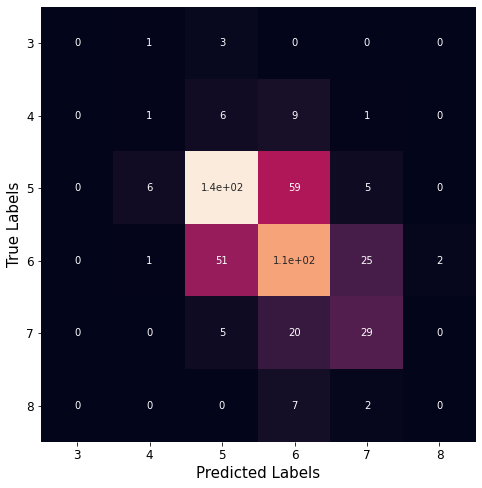

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.11      0.06      0.08        17
           5       0.68      0.66      0.67       206
           6       0.54      0.58      0.56       190
           7       0.47      0.54      0.50        54
           8       0.00      0.00      0.00         9

    accuracy                           0.58       480
   macro avg       0.30      0.31      0.30       480
weighted avg       0.56      0.58      0.57       480



C:\Users\Esosa\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
cm = confusion_matrix(y_test, dtP)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(numbers, fontsize = 12)
ax.yaxis.set_ticklabels(numbers, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
print(classification_report(y_test, dtP))

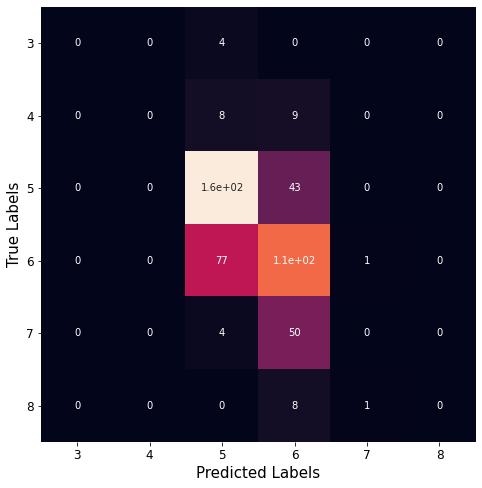

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.64      0.79      0.71       206
           6       0.50      0.59      0.54       190
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00         9

    accuracy                           0.57       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.47      0.57      0.52       480



In [53]:
cm = confusion_matrix(y_test, logregP)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(numbers, fontsize = 12)
ax.yaxis.set_ticklabels(numbers, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
print(classification_report(y_test, logregP))

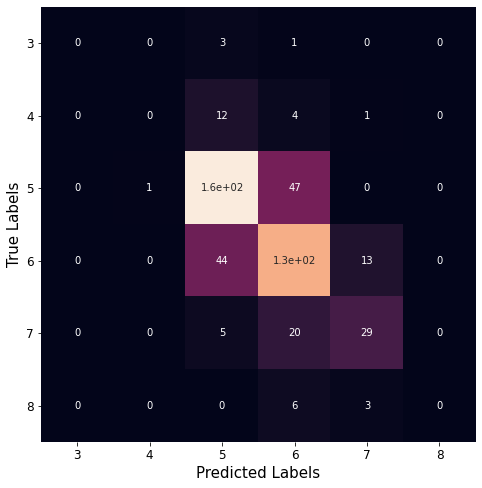

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.71      0.77      0.74       206
           6       0.63      0.70      0.66       190
           7       0.63      0.54      0.58        54
           8       0.00      0.00      0.00         9

    accuracy                           0.67       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.63      0.67      0.64       480



In [54]:
cm = confusion_matrix(y_test, lgbmP)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(numbers, fontsize = 12)
ax.yaxis.set_ticklabels(numbers, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
print(classification_report(y_test, lgbmP))

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best performing model was the LightGBM model probably due to its insensitivity to outliers 